# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in this lab's data folder.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [296]:
# import libraries here
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [9]:
# your code here
temp = pd.read_csv('../data/Temp_States.csv',';').drop(columns=['Unnamed: 3'])

#### Print `temp`.

In [10]:
# your code here
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [12]:
# your code here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In [0]:
"""
your comments here

We have 2 categorical data types and one numerical. 
"""

#### Select the rows where state is New York.

In [21]:
# your code here
temp[temp['State']=='New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average temperature of cities in New York?

In [28]:
# your code here
temp[temp['State']=='New York'].mean()
#temp[temp['State']=='New York'].describe().loc['mean']

Temperature    10.740741
dtype: float64

#### Which states and cities have a temperature above 15 degrees Celsius?

In [44]:
# your code here
list_states_above_15_c = list(temp[temp['Temperature']>15]['State'].unique())
list_cities_above_15_c = list(temp[temp['Temperature']>15]['City'].unique())
temp[temp['Temperature']>15][['State','City']]

,State,City
0,New York,NYC
3,Connecticut,Hartford
5,New Jersey,Treton
6,New Jersey,Newark


In [41]:
print(list_states_above_15_c,list_cities_above_15_c)

['New York', 'Connecticut', 'New Jersey'] ['NYC', 'Hartford', 'Treton', 'Newark']


#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [45]:
temp[temp['Temperature']>15]['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

In [42]:
# your code here
list_cities_above_15_c = list(temp[temp['Temperature']>15]['City'].unique())
list_cities_above_15_c

['NYC', 'Hartford', 'Treton', 'Newark']

#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [47]:
# your code here
mask =(temp['Temperature']>15) & (temp['Temperature']<20)
temp[mask]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and standard deviation of the temperature of each state.

In [81]:
# your code here
temp.groupby(by=['State']).describe().T.loc['Temperature'].loc[['mean','std']]

State,Connecticut,New Jersey,New York
mean,15.833333,21.111111,10.740741
std,1.964186,1.571348,8.133404


In [82]:
temp.groupby(by=['State'])['Temperature'].agg(['mean','std']).T
#como trocar o nome das colunas agg

State,Connecticut,New Jersey,New York
mean,15.833333,21.111111,10.740741
std,1.964186,1.571348,8.133404


# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [90]:
# your code here
employees = pd.read_csv('../data/employees.csv',';').drop(columns=['Unnamed: 7'])

#### Explore the data types of the `employees` dataframe. Comment your results.

In [92]:
# your code here
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [93]:
employees.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [0]:
"""
your comments here

employees has 5 columns with categorical types of data and 2 columns with numerical. We have information about employees
"""

#### What's the average salary in this company?

In [98]:
# your code here
employees['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [99]:
# your code here
employees['Salary'].max()

70

#### What's the lowest salary?

In [100]:
# your code here
employees['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [101]:
# your code here
mask = employees['Salary'] == employees['Salary'].min()

In [102]:
employees[mask]['Name']

1    Maria
2    David
Name: Name, dtype: object

#### Find all the information about an employee called David.

In [103]:
# your code here
employees[employees['Name']=='David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you return only David's salary?

In [122]:
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [123]:
mask2 = employees['Education']=='Master'

In [128]:
employees.loc[mask2]
#loc mais eficiente em relação a mask sozinha. Primeiro faz o filtro na coluna e depois seleciona df todo
#com mask puro, carrega primeiro a base e depois filtra. 

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
4,Samuel,Sales,Master,M,associate,3,55
6,Carlos,IT,Master,M,VP,8,70
8,Ana,HR,Master,F,VP,8,70


In [109]:
# your code here
employees[employees['Name']=='David']['Salary']

2    30
Name: Salary, dtype: int64

In [121]:
employees[['Name','Salary']].set_index('Name').loc['David']

Salary    30
Name: David, dtype: int64

#### Print all the rows where job title is associate.

In [129]:
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [130]:
# your code here
mask3 = employees['Title']== 'associate'
employees.loc[mask3]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [131]:
# Method 1
# your code here
employees.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [133]:
# Method 2
# your code here
employees.iloc[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees whose title is associate and whose salary is above 55.

In [134]:
# your code here
mask4 = (employees['Title']== 'associate') & (employees['Salary']>55)
employees[mask4]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees by number of years of employment. What are the average salaries in each group?

In [136]:
# your code here
employees.groupby(by='Years')['Salary'].mean()

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average salary per title?

In [137]:
# your code here
employees.groupby(by='Title')['Salary'].mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

####  Find the salary quartiles.


In [142]:
# your code here
employees['Salary'].quantile([0.25,0.5,0.75,1])

0.25    35.0
0.50    55.0
0.75    60.0
1.00    70.0
Name: Salary, dtype: float64

#### Is the mean salary different per gender?

In [144]:
# your code here
employees.groupby(by='Gender')['Salary'].mean()
#yes

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [165]:
# your code here
employees.groupby(by='Department').describe()[['Years','Salary']]

Years                                                Salary         \
           count      mean       std  min   25%  50%   75%  max  count   mean   
Department                                                                      
HR           3.0  4.666667  3.055050  2.0  3.00  4.0  6.00  8.0    3.0  45.00   
IT           4.0  4.500000  3.511885  1.0  1.75  4.5  7.25  8.0    4.0  48.75   
Sales        2.0  2.500000  0.707107  2.0  2.25  2.5  2.75  3.0    2.0  55.00   

                                                      
                  std   min    25%   50%   75%   max  
Department                                            
HR          21.794495  30.0  32.50  35.0  52.5  70.0  
IT          19.311050  30.0  33.75  47.5  62.5  70.0  
Sales        0.000000  55.0  55.00  55.0  55.0  55.0

In [163]:
employees.groupby(by='Department').agg({'mean','min','max'})

Years         Salary        
                mean min max   mean min max
Department                                 
HR          4.666667   2   8  45.00  30  70
IT          4.500000   1   8  48.75  30  70
Sales       2.500000   2   3  55.00  55  55

#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [206]:
# your code here
#nao consegui, perguntar depois!!!!!
employees.groupby(by='Department').agg({'Salary':['max','min']})

Salary    
              max min
Department           
HR             70  30
IT             70  30
Sales          55  55

In [205]:
employees.groupby(by='Department').agg({'Salary':['max','min']})['Salary'].apply(lambda x: x['max'] - x['min'],axis=1)

Department
HR       40
IT       40
Sales     0
dtype: int64

In [207]:
employees.groupby(by='Department').agg({'Salary':['max']})['Salary']['max']-employees.groupby(by='Department').agg({'Salary':['min']})['Salary']['min']

Department
HR       40
IT       40
Sales     0
dtype: int64

# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [297]:
# your code here
orders = pd.read_csv('../data/Orders.csv').drop(columns=['Unnamed: 0'])

#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [221]:
# your code here
orders.dtypes.value_counts()

int64      7
object     4
float64    2
dtype: int64

In [222]:
orders.head(3)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [0]:
"""
your comments here

we have 7 columns with int values, 4 with object and 2 with float64    
"""

####  What is the average purchase price?

In [224]:
# your code here
orders['UnitPrice'].mean()

3.116174480549152

In [225]:
orders['purchase']=orders['Quantity']*orders['UnitPrice']

In [226]:
orders['purchase'].mean()

22.39474850474768

#### What are the highest and lowest purchase prices? 

In [231]:
mask=orders['purchase']!=0

In [232]:
# your code here
orders[mask]['purchase'].describe()[['min','max']]

min         0.001
max    168469.600
Name: purchase, dtype: float64

#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [239]:
orders.head(3)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,purchase
0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,Spain,15.30,15.30
1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,Spain,20.34,20.34
2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,Spain,22.00,22.00


In [243]:
# your code here
mask2 = orders['Country'] =='Spain'
orders[mask2]['CustomerID'].unique()

array([17850, 13047, 12583, ..., 13298, 14569, 12713], dtype=int64)

#### How many customers do we have in Spain?

In [244]:
# your code here
len(orders[mask2]['CustomerID'].unique())

4339

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [276]:
# your code here
mask3 = pd.DataFrame(orders['CustomerID'].value_counts()>50).reset_index()

mask5 =mask3['CustomerID']==True
list_customers_50_items = mask3[mask5]['index']



#como usar dessa outra forma:
#mask4 = 'CustomerID'].value_counts()>50)
#orders[mask2]['CustomerID'][orders[mask2][mask4]

#### Select orders from Spain that include more than 50 items.

In [286]:
orders.head(3)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,purchase
0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,Spain,15.30,15.30
1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,Spain,20.34,20.34
2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,Spain,22.00,22.00


In [288]:
# your code here
mask6 = orders['Quantity']>50
orders[mask6][orders['Country']=='Spain']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,purchase
46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,Spain,204.00,204.00
83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,Spain,163.20,163.20
96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,Spain,50.40,50.40
102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,Spain,36.48,36.48
174,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,Spain,165.00,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397720,581566,23404,2011,12,5,11,home sweet home blackboard,144,2011-12-09 11:50:00,3.26,18102,Spain,469.44,469.44
397721,581567,21417,2011,12,5,11,cockle shell dish,84,2011-12-09 11:56:00,0.79,16626,Spain,66.36,66.36
397729,581567,21326,2011,12,5,11,aged glass silver t-light holder,144,2011-12-09 11:56:00,0.55,16626,Spain,79.20,79.20
397761,581571,23167,2011,12,5,12,small ceramic top storage jar,96,2011-12-09 12:00:00,0.69,15311,Spain,66.24,66.24


#### Select all free orders.

In [289]:
# your code here
orders[orders['purchase']==0]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,purchase
6914,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Spain,0.0,0.0
22539,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,Spain,0.0,0.0
25379,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,Spain,0.0,0.0
29080,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,Spain,0.0,0.0
29082,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,Spain,0.0,0.0
34494,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,Spain,0.0,0.0
53788,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,Spain,0.0,0.0
85671,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,Spain,0.0,0.0
92875,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,Spain,0.0,0.0
97430,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,Spain,0.0,0.0


#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [295]:
# your code here
orders.filter(lambda x: x.startswith('lunch bag'),list(orders['Description']))

TypeError: Keyword arguments `items`, `like`, or `regex` are mutually exclusive

#### Select all `lunch bag` orders made in 2011.

In [0]:
# your code here

#### Show the frequency distribution of the amount spent in Spain.

In [307]:
x = orders[orders['Country']=='Spain']['amount_spent']
x

4250      115.50
4251      145.00
4252       99.00
4253      115.50
4254      145.00
           ...  
394733      2.50
394734      4.95
394735      3.90
394736      2.08
394737      2.89
Name: amount_spent, Length: 2485, dtype: float64

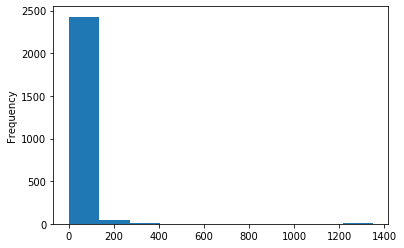

In [303]:
# your code here

#x.hist()
x.plot(kind='hist')

(array([2.428e+03, 3.900e+01, 9.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 5.000e+00]),
 array([   0.,  135.,  270.,  405.,  540.,  675.,  810.,  945., 1080.,
        1215., 1350.]),
 <a list of 10 Patch objects>)

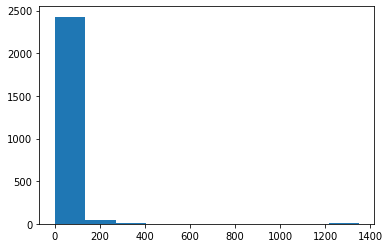

In [305]:
plt.hist(x)

#### Select all orders made in the month of August.

In [308]:
# your code here
orders.head(3)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [309]:
orders[orders['month']==8]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [314]:
# your code here
orders[orders['month']==8]['Country'].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country?

In [317]:
# your code here
orders[orders['month']==8].groupby(by=['Country'])['amount_spent'].sum()

Country
Australia           22489.20
Austria              1516.08
Belgium              3554.02
Canada                 51.56
Channel Islands      4896.78
Denmark               213.15
EIRE                16967.38
Finland              1376.50
France              13810.96
Germany             19220.77
Iceland               584.91
Israel               4873.81
Italy                1990.95
Malta                1119.00
Netherlands         40327.81
Norway               2025.81
Poland                401.80
Portugal             1221.40
Spain                3346.91
Sweden               1400.86
Switzerland          4969.89
United Kingdom     498453.32
Unspecified           531.03
Name: amount_spent, dtype: float64

#### What's the most expensive item?

In [319]:
# your code here
orders[orders['UnitPrice']== orders['UnitPrice'].max()]['Description']

118352    postage
Name: Description, dtype: object

#### What is the average amount spent per year?

In [321]:
# your code here
orders.groupby(by=['year'])['amount_spent'].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64